Data loading
1. Defining the libraries
2. Download the data from yahoo_finance using pandas_datareader.
3. Vertically merge the files corresponding to 31 downloaded stock tickers.
4. Horizontally merge the files.
5. Data preprocessing steps defined next.

In [1]:
### Loads in modules for this script 

from datetime import datetime
from concurrent import futures
import pandas as pd
from pandas import DataFrame
### Loads in the yahoo finance fix
#from pandas_datareader import data as pdr
#import fix_yahoo_finance as yf
#yf.pdr_override()
import os
import seaborn as sns
import matplotlib.pyplot as plt   
%matplotlib inline
%pylab inline

import csv
import glob
import os

Populating the interactive namespace from numpy and matplotlib


C:\Users\shwts\AppData\Local\Continuum\anaconda3\lib\site-packages\IPython\core\magics\pylab.py:160: UserWarning: pylab import has clobbered these variables: ['datetime']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [2]:
#Change the working directory to read the input files
os.chdir('C:/Users/shwts/Documents/MichelCave_Python/MidTermExam/stock-time-series-20050101-to-20171231')

In [41]:
# ### initializes the current time and start time.  Right now it is set for 5 years of data
# now_time = datetime.now()
# start_time = datetime(now_time.year - 5, now_time.month , now_time.day)

In [40]:
# def download_stock(stock):
#     """ try to query the iex for a stock, if failed note with print """
#     try:
#         print(stock)
#         stock_df = pdr.get_data_yahoo(stock, start_time, now_time)
#         stock_df['Name'] = stock
#         stock_df.columns = [str(col) + stock for col in stock_df.columns]
#         output_name = stock + '_data.csv'
#         stock_df.to_csv(output_name)
#     except:
#         bad_names.append(stock)
#         print('bad: %s' % (stock))
        
# if __name__ == '__main__':

#     """ set the download window """
#     now_time = datetime.now()
#     start_time = datetime(now_time.year - 5, now_time.month , now_time.day)

#     """ list of s_and_p companies """
#     s_and_p = ['MMM','ABT','ABBV','ACN','ATVI','AYI','ADBE','AMD','AAP','AES','AET',
#         'AMG','AFL','A','APD','AKAM','ALK','ALB','ARE','ALXN','ALGN','ALLE',
#         'AGN','ADS','LNT','ALL','GOOGL','GOOG','MO','AMZN','AEE','AAL','AEP',
#         'AXP','AIG','AMT','AWK','AMP','ABC','AME','AMGN','APH','APC','ADI','ANDV',
#         'ANSS','ANTM','AON','AOS','APA','AIV','AAPL','AMAT','APTV','ADM','ARNC',
#         'AJG','AIZ','T','ADSK','ADP','AZO','AVB','AVY','BHGE','BLL','BAC','BK',
#         'BAX','BBT','BDX','BRK.B','BBY','BIIB','BLK','HRB','BA','BWA','BXP','BSX',
#         'BHF','BMY','AVGO','BF.B','CHRW','CA','COG','CDNS','CPB','COF','CAH','CBOE',
#         'KMX','CCL','CAT','CBG','CBS','CELG','CNC','CNP','CTL','CERN','CF','SCHW',
#         'CHTR','CHK','CVX','CMG','CB','CHD','CI','XEC','CINF','CTAS','CSCO','C','CFG',
#         'CTXS','CLX','CME','CMS','KO','CTSH','CL','CMCSA','CMA','CAG','CXO','COP',
#         'ED','STZ','COO','GLW','COST','COTY','CCI','CSRA','CSX','CMI','CVS','DHI',
#         'DHR','DRI','DVA','DE','DAL','XRAY','DVN','DLR','DFS','DISCA','DISCK','DISH',
#         'DG','DLTR','D','DOV','DWDP','DPS','DTE','DRE','DUK','DXC','ETFC','EMN','ETN',
#         'EBAY','ECL','EIX','EW','EA','EMR','ETR','EVHC','EOG','EQT','EFX','EQIX','EQR',
#         'ESS','EL','ES','RE','EXC','EXPE','EXPD','ESRX','EXR','XOM','FFIV','FB','FAST',
#         'FRT','FDX','FIS','FITB','FE','FISV','FLIR','FLS','FLR','FMC','FL','F','FTV',
#         'FBHS','BEN','FCX','GPS','GRMN','IT','GD','GE','GGP','GIS','GM','GPC','GILD',
#         'GPN','GS','GT','GWW','HAL','HBI','HOG','HRS','HIG','HAS','HCA','HCP','HP','HSIC',
#         'HSY','HES','HPE','HLT','HOLX','HD','HON','HRL','HST','HPQ','HUM','HBAN','HII',
#         'IDXX','INFO','ITW','ILMN','IR','INTC','ICE','IBM','INCY','IP','IPG','IFF','INTU',
#         'ISRG','IVZ','IQV','IRM','JEC','JBHT','SJM','JNJ','JCI','JPM','JNPR','KSU','K','KEY',
#         'KMB','KIM','KMI','KLAC','KSS','KHC','KR','LB','LLL','LH','LRCX','LEG','LEN','LUK',
#         'LLY','LNC','LKQ','LMT','L','LOW','LYB','MTB','MAC','M','MRO','MPC','MAR','MMC','MLM',
#         'MAS','MA','MAT','MKC','MCD','MCK','MDT','MRK','MET','MTD','MGM','KORS','MCHP','MU',
#         'MSFT','MAA','MHK','TAP','MDLZ','MON','MNST','MCO','MS','MOS','MSI','MYL','NDAQ',
#         'NOV','NAVI','NTAP','NFLX','NWL','NFX','NEM','NWSA','NWS','NEE','NLSN','NKE','NI',
#         'NBL','JWN','NSC','NTRS','NOC','NCLH','NRG','NUE','NVDA','ORLY','OXY','OMC','OKE',
#         'ORCL','PCAR','PKG','PH','PDCO','PAYX','PYPL','PNR','PBCT','PEP','PKI','PRGO','PFE',
#         'PCG','PM','PSX','PNW','PXD','PNC','RL','PPG','PPL','PX','PCLN','PFG','PG','PGR',
#         'PLD','PRU','PEG','PSA','PHM','PVH','QRVO','PWR','QCOM','DGX','RRC','RJF','RTN','O',
#         'RHT','REG','REGN','RF','RSG','RMD','RHI','ROK','COL','ROP','ROST','RCL','CRM','SBAC',
#         'SCG','SLB','SNI','STX','SEE','SRE','SHW','SIG','SPG','SWKS','SLG','SNA','SO','LUV',
#         'SPGI','SWK','SBUX','STT','SRCL','SYK','STI','SYMC','SYF','SNPS','SYY','TROW','TPR',
#         'TGT','TEL','FTI','TXN','TXT','TMO','TIF','TWX','TJX','TMK','TSS','TSCO','TDG','TRV',
#         'TRIP','FOXA','FOX','TSN','UDR','ULTA','USB','UAA','UA','UNP','UAL','UNH','UPS','URI',
#         'UTX','UHS','UNM','VFC','VLO','VAR','VTR','VRSN','VRSK','VZ','VRTX','VIAB','V','VNO',
#         'VMC','WMT','WBA','DIS','WM','WAT','WEC','WFC','HCN','WDC','WU','WRK','WY','WHR','WMB',
#         'WLTW','WYN','WYNN','XEL','XRX','XLNX','XL','XYL','YUM','ZBH','ZION','ZTS']

#     bad_names =[] #to keep track of failed queries

#     """here we use the concurrent.futures module's ThreadPoolExecutor
#         to speed up the downloads buy doing them in parallel 
#         as opposed to sequentially """

#     #set the maximum thread number
#     max_workers = 1

#     workers = min(max_workers, len(s_and_p)) #in case a smaller number of stocks than threads was passed in
#     with futures.ThreadPoolExecutor(workers) as executor:
#         res = executor.map(download_stock, s_and_p)


#     """ Save failed queries to a text file to retry """
#     if len(bad_names) > 0:
#         with open('failed_queries.txt','w') as outfile:
#             for name in bad_names:
#                 outfile.write(name+'\n')

#     #timing:
#     finish_time = datetime.now()
#     duration = finish_time - now_time
#     minutes, seconds = divmod(duration.seconds, 60)
#     print('getSandP_threaded.py')
#     print(f'The threaded script took {minutes} minutes and {seconds} seconds to run.')


In [3]:
#merge all csv files vertically

path = '.'
files_in_dir = [f for f in os.listdir(path) if f.endswith('csv')]

for filenames in files_in_dir:
    df = pd.read_csv(filenames)
    df.to_csv('C:/Users/shwts/Documents/MichelCave_Python/MidTermExam/InputFiles/AllStocks.csv', mode='a')

In [4]:
### merge all csv files horizontally
import pandas as pd

interesting_files = glob.glob("*.csv") 
df = pd.concat((pd.read_csv(f, header = 0) for f in interesting_files), axis=1)
df.to_csv('C:/Users/shwts/Documents/MichelCave_Python/MidTermExam/InputFiles/output.csv')

#In beta...does not work yet

Change the working directory to point to the horizontally consolidated and vertically consolidated files.
This is required because we do not want the created Vertically stacked file to be added as input for Horizontally stacked files.
Also the data in 'all_stocks_2006-01-01_to_2018-01-01.csv' and 'all_stocks_2017-01-01_to_2018-01-01.csv' is removed from the input file directory while loading the data to avoid data duplicate.

In [5]:
#Change the working directory to read the consolidated input files
os.chdir('C:/Users/shwts/Documents/MichelCave_Python/MidTermExam/InputFiles')

#Preparation of the dataframe
1. First read the data from vertically stacked file
2. Remove the unwanted Unnamed column created
3. Also observed that while stacking the data vertically, the column header is also appended. Remove the repeated column header.
4. Due to presence of column header as data in columns, python create the dataframe with columns as object datatype.
5. To work with matplotlib and mathematical manipulation, convert the columns in their respective numerical data types.
6. Created 3 more columns corresponding to Month, Year and Date values extracted from Date field.

In [6]:
#Read the data from the csv file
df_stock = pd.read_csv('AllStocks.csv')

#Remove the unwanted Unnamed column created due to default indexing in python
df_stock.drop('Unnamed: 0',axis=1, inplace=True)

#Remove the extra header column created due to vertical merge
df_stock = df_stock.ix[~df_stock.isin(['Date','Open', 'High','Low','Close','Volume','Name']).any(1)]

#Convert the data to respective data type
df_stock['Open'] = df_stock['Open'].astype(float)
df_stock['High'] = df_stock['High'].astype(float)
df_stock['Low'] = df_stock['Low'].astype(float)
df_stock['Close'] = df_stock['Close'].astype(float)
df_stock['Volume'] = df_stock['Volume'].astype(float)
df_stock['Date'] = pd.to_datetime(df_stock['Date'])

#Create 3 extra columns to storing month, year and date values extracted from date field
df_stock['Month_No'] = df_stock['Date'].dt.strftime('%m')
df_stock['Year_No'] = df_stock['Date'].dt.strftime('%Y')
df_stock['Date_No'] = df_stock['Date'].dt.strftime('%d')

#Check the data types
df_stock.info()

C:\Users\shwts\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:8: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  


<class 'pandas.core.frame.DataFrame'>
Int64Index: 93612 entries, 0 to 93641
Data columns (total 10 columns):
Date        93612 non-null datetime64[ns]
Open        93587 non-null float64
High        93602 non-null float64
Low         93592 non-null float64
Close       93612 non-null float64
Volume      93612 non-null float64
Name        93612 non-null object
Month_No    93612 non-null object
Year_No     93612 non-null object
Date_No     93612 non-null object
dtypes: datetime64[ns](1), float64(5), object(4)
memory usage: 7.9+ MB


### Question:1 Load in all stock tickers as variables with the ticker symbol as their variable name, including the all stock csv file
Created a data dictionary where the stock ticker name is acting as Key and their corresponding value is the dataframe corresponding to that stock.

In [7]:
#create unique list of stock tickers
nameStockTicker = df_stock['Name'].unique()

#create a data frame dictionary to store your data frames
DataDictStocks = {elem : pd.DataFrame for elem in nameStockTicker}

for key in DataDictStocks.keys():
    DataDictStocks[key] = df_stock[:][df_stock.Name == key].reset_index()
    DataDictStocks[key].drop('index',axis=1, inplace=True)
   
#check the data for stock tickers using key
DataDictStocks['IBM'].head()

,Date,Open,High,Low,Close,Volume,Name,Month_No,Year_No,Date_No
0,2006-01-03,82.45,82.55,80.81,82.06,11715200.0,IBM,01,2006,03
1,2006-01-04,82.20,82.50,81.33,81.95,9840600.0,IBM,01,2006,04
2,2006-01-05,81.40,82.90,81.00,82.50,7213500.0,IBM,01,2006,05
3,2006-01-06,83.95,85.03,83.41,84.95,8197400.0,IBM,01,2006,06
4,2006-01-09,84.10,84.25,83.38,83.73,6858200.0,IBM,01,2006,09


In [8]:
nameStockTicker

array(['AABA', 'AAPL', 'AMZN', 'AXP', 'BA', 'CAT', 'CSCO', 'CVX', 'DIS',
       'GE', 'GOOGL', 'GS', 'HD', 'IBM', 'INTC', 'JNJ', 'JPM', 'KO',
       'MCD', 'MMM', 'MRK', 'MSFT', 'NKE', 'PFE', 'PG', 'TRV', 'UNH',
       'UTX', 'VZ', 'WMT', 'XOM'], dtype=object)

In [9]:
ST_AABA = df_stock[df_stock['Name']=='AABA']
ST_AAPL = df_stock[df_stock['Name']=='AAPL']
ST_AMZN = df_stock[df_stock['Name']=='AMZN']
ST_AXP = df_stock[df_stock['Name']=='AXP']
ST_BA = df_stock[df_stock['Name']=='BA']
ST_CAT = df_stock[df_stock['Name']=='CAT']
ST_CSCO = df_stock[df_stock['Name']=='CSCO']
ST_CVX = df_stock[df_stock['Name']=='CVX']
ST_DIS = df_stock[df_stock['Name']=='DIS']
ST_GE = df_stock[df_stock['Name']=='GE']
ST_GOOGL = df_stock[df_stock['Name']=='GOOGL']
ST_GS = df_stock[df_stock['Name']=='GS']
ST_HD = df_stock[df_stock['Name']=='HD']
ST_IBM = df_stock[df_stock['Name']=='IBM']
ST_INTC = df_stock[df_stock['Name']=='INTC']
ST_JNJ = df_stock[df_stock['Name']=='JNJ']
ST_JPM = df_stock[df_stock['Name']=='JPM']
ST_KO = df_stock[df_stock['Name']=='KO']
ST_MCD = df_stock[df_stock['Name']=='MCD']
ST_MMM = df_stock[df_stock['Name']=='MMM']
ST_MSK = df_stock[df_stock['Name']=='MRK']
ST_MSFT = df_stock[df_stock['Name']=='MSFT']
ST_NKE = df_stock[df_stock['Name']=='NKE']
ST_PFE = df_stock[df_stock['Name']=='PFE']
ST_PG = df_stock[df_stock['Name']=='PG']
ST_TRV = df_stock[df_stock['Name']=='TRV']
ST_UNH = df_stock[df_stock['Name']=='UNH']
ST_UTX = df_stock[df_stock['Name']=='UTX']
ST_VZ = df_stock[df_stock['Name']=='VZ']
ST_WMT = df_stock[df_stock['Name']=='WMT']
ST_XOM = df_stock[df_stock['Name']=='XOM']

### Question: 2  Perform Exploratory data analysis and data visualization for different time periods using given stock dataset.
Analysis Performed:
1. What is the max Close price for each bank's stock throughout the time period.
2. Stocks market trend over the year based on minimum value of stock High, Low, Open and Close price.
3. Pairplot to analyze the percentage change variation in one stock based on the Close prices with respect to another.
4. Patterns in Worst performance of the stock on a particular day
5. Patterns in Best Single Day Gain.
6. Analysis of Stock Values based on risk associated with them.
7. Correlation among various stocks based on their close value.
8. Histogram to show the distribution of return percentage 
9. Box plot to understand the stocks volatility.

In [10]:
#What is the max Close price for each bank's stock throughout the time period
df_MaxStock=df_stock.groupby(['Name'],as_index=False)['Close'].max().rename(columns={'Close':'Close_Max'}).sort_values(by='Close_Max',ascending=False)
df_MaxStock

,Name,Close_Max
2,AMZN,1195.83
10,GOOGL,1085.09
4,BA,297.90
11,GS,261.01
19,MMM,243.14
26,UNH,228.17
13,IBM,215.80
12,HD,190.36
1,AAPL,176.42
18,MCD,174.20


We can see from the above resultset that AMZN and GOOGL has the highest closing price and CSCO and PFE has the lowest closing value over the years.

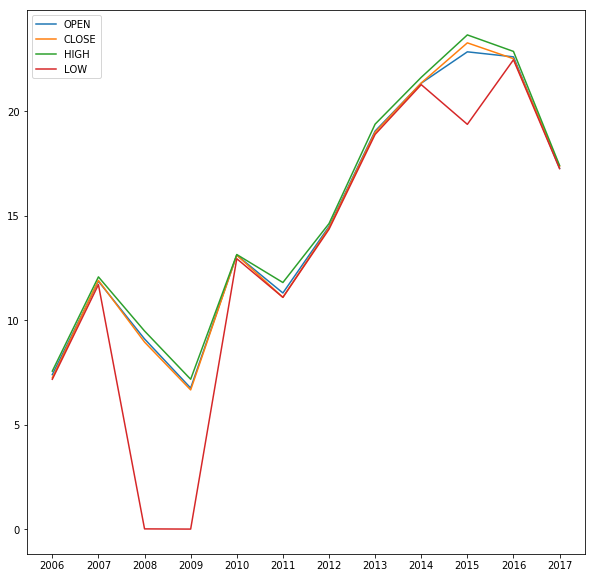

In [11]:
#Stocks market trend over the year based on minimum value of stock
df_Year = df_stock.groupby('Year_No',as_index=False)[['Close','Open','High','Low']].min()
pylab.rcParams['figure.figsize'] = (10, 10)
plt.plot(df_Year['Year_No'], df_Year['Open'])
plt.plot(df_Year['Year_No'], df_Year['Close'])
plt.plot(df_Year['Year_No'], df_Year['High'])
plt.plot(df_Year['Year_No'], df_Year['Low'])

plt.legend(['OPEN', 'CLOSE','HIGH','LOW'], loc='upper left')

plt.show()


From the above plot we can see that stock prices have fallen heavily in 2008-2009 and 2015-2016. The fall in the 2008-2009 can be attibuted to recession. Will do further analysis on what companies in later sections

In [12]:
#Read the data from the csv file
df_H_Stocks = pd.read_csv('Output.csv')

#Remove the unwanted Unnamed column created due to default indexing in python
df_H_Stocks.drop('Unnamed: 0',axis=1, inplace=True)

df_H_Close = df_H_Stocks[['Date','Close','Close.1','Close.2','Close.3','Close.4','Close.5','Close.6','Close.7','Close.8','Close.9','Close.10','Close.11','Close.12','Close.13','Close.14','Close.15','Close.16','Close.17','Close.18','Close.19','Close.20','Close.21','Close.22','Close.23','Close.24','Close.25','Close.26','Close.27','Close.28','Close.29','Close.30']] 
df_H_Close.columns = ['Date','AABA','AAPL','AMZN','AXP','BA','CAT','CSCO','CVX','DIS','GE','GOOGL','GS','HD','IBM','INTC','JNJ','JPM','KO','MCD','MMM','MRK','MSFT','NKE','PFE','PG','TRV','UNH','UTX','VZ','WMT','XOM']
df_H_Close.set_index('Date',inplace=True)

stock_tickers = ['AABA','AAPL','AMZN','AXP','BA','CAT','CSCO','CVX','DIS','GE','GOOGL','GS','HD','IBM','INTC','JNJ','JPM','KO','MCD','MMM','MRK','MSFT','NKE','PFE','PG','TRV','UNH','UTX','VZ','WMT','XOM']
returns=pd.DataFrame()
for tick in stock_tickers:
    returns[tick+' Return'] = df_H_Close[tick].pct_change()
returns.head()


,AABA Return,AAPL Return,AMZN Return,AXP Return,BA Return,CAT Return,CSCO Return,CVX Return,DIS Return,GE Return,...,MSFT Return,NKE Return,PFE Return,PG Return,TRV Return,UNH Return,UTX Return,VZ Return,WMT Return,XOM Return
Date,,,,,,,,,,,,,,,,,,,,,
2006-01-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2006-01-04,0.001467,0.002809,-0.006936,-0.011982,0.010363,0.025433,0.022923,-0.002877,-0.016803,-0.001414,...,0.004844,-0.004655,0.032380,0.001871,0.011089,0.002430,-0.006015,0.029296,0.001947,0.001710
2006-01-05,0.013669,-0.007470,0.008466,0.010587,-0.011803,0.000000,0.028011,-0.012222,0.017507,-0.002548,...,0.000742,0.006548,0.001222,-0.003226,0.009677,-0.003070,-0.003737,0.011513,-0.013601,-0.004951
2006-01-06,0.040453,0.025400,0.004617,0.003429,-0.013934,0.019909,0.022888,0.018216,0.013519,0.006812,...,-0.002964,-0.003717,0.010985,-0.001022,0.005538,0.019614,0.003215,-0.008852,0.004158,0.019732
2006-01-09,0.004860,-0.003670,-0.016503,0.024867,-0.008363,0.018197,0.015450,-0.005063,0.010509,-0.002537,...,-0.001858,0.014925,0.000000,0.007503,0.000424,-0.023847,0.011396,0.004147,-0.003705,-0.000505


From the above pair plot we can observe that the percentage change in return value based on the close price of stock, is quite similar in most of the stocks, the variation in the stock close price is between -2 to +2 (broadly) for almost all the stocks. But out of the observed 19 stocks, we can see crash in the prices of stocks for some tickers like 'CAT', 'CVX','JNJ', 'KO' etc, where the stock prices has fallen enormously.

The above resultset shows that on date September 9,2008, the financial crisis day (due to recession), 5 stocks performed badly simultaneously out of 31 stocks and on October 15, 2008 - 4 stocks performed badly probably due to continuous effect of recession.

In [15]:
# Best Single Day Gain
returns.idxmax()

AABA Return     2008-02-01
AAPL Return     2008-10-13
AMZN Return     2007-04-25
AXP Return      2009-04-24
BA Return       2008-10-28
CAT Return      2008-10-13
CSCO Return     2011-08-11
CVX Return      2008-10-13
DIS Return      2008-10-13
GE Return       2009-03-10
GOOGL Return    2008-04-18
GS Return       2008-11-24
HD Return       2008-10-28
IBM Return      2009-01-21
INTC Return     2008-10-13
JNJ Return      2008-10-13
JPM Return      2009-01-21
KO Return       2008-10-13
MCD Return      2008-10-28
MMM Return      2008-10-13
MRK Return      2009-03-13
MSFT Return     2008-10-13
NKE Return      2008-10-28
PFE Return      2008-10-13
PG Return       2008-10-28
TRV Return      2008-09-30
UNH Return      2008-10-13
UTX Return      2008-10-13
VZ Return       2008-10-28
WMT Return      2008-10-28
XOM Return      2008-10-13
dtype: object

As there was a pattern between the worst return day for the stock, similarly there is a pattern observed for the best gain day in the stock. The above resultset shows that on date October 13,2008, 13 stocks shown an upward trend simultaneously out of 31 stocks and on October 28, 2008 - 8 stocks shown gain trend.

In [16]:
#Risk Analysis associated with various stocks.
returns.std()

AABA Return     0.024339
AAPL Return     0.020418
AMZN Return     0.025205
AXP Return      0.023259
BA Return       0.017497
CAT Return      0.020141
CSCO Return     0.018377
CVX Return      0.016701
DIS Return      0.016593
GE Return       0.018669
GOOGL Return    0.018449
GS Return       0.023915
HD Return       0.016427
IBM Return      0.013527
INTC Return     0.017952
JNJ Return      0.009914
JPM Return      0.025813
KO Return       0.011155
MCD Return      0.011701
MMM Return      0.013509
MRK Return      0.015818
MSFT Return     0.016949
NKE Return      0.017080
PFE Return      0.013894
PG Return       0.010747
TRV Return      0.017591
UNH Return      0.020623
UTX Return      0.014638
VZ Return       0.013466
WMT Return      0.012241
XOM Return      0.015136
dtype: float64

As we did the analysis for the best day and worst day, similarly we can analyse the stock values for their risk based on their standard deviations.

C:\Users\shwts\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


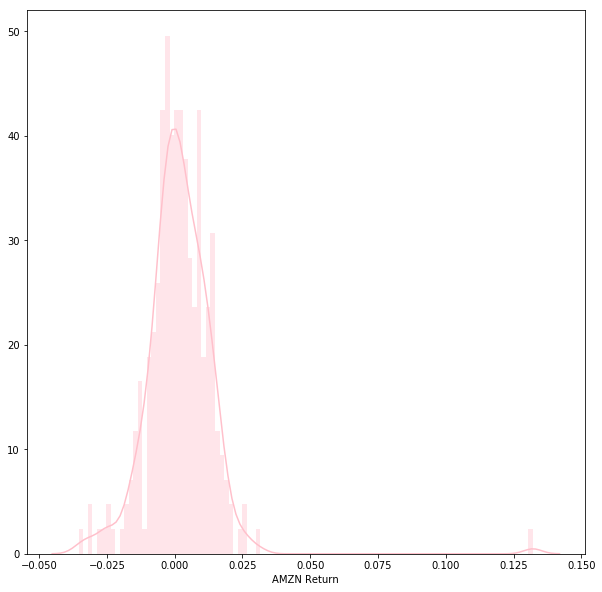

In [18]:
#Visualization of the distribution of return percentage for Amazon in last one years 
sns.distplot(returns.loc['2016-12-29':'2017-12-29']['AMZN Return'],color='pink',bins=100)

The above distribution of return for the Amazon stocks is approximately normal about the mean. But there are some outliers too.

C:\Users\shwts\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


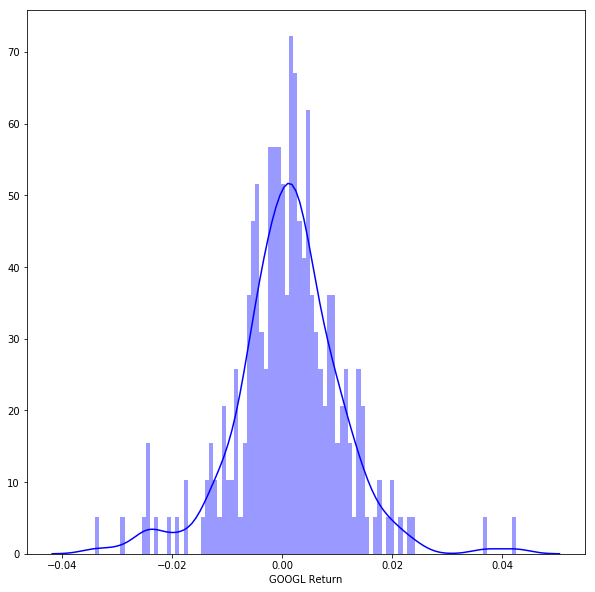

In [19]:
#Visualization of the distribution of return percentage for Google in last one years 
sns.distplot(returns.loc['2016-12-29':'2017-12-29']['GOOGL Return'],color='blue',bins=100)

The above plot shows that Amazon shows quite normally distributed return values but google return distribution does not look like a good normal curve. There are many values which falls beyond the curve.

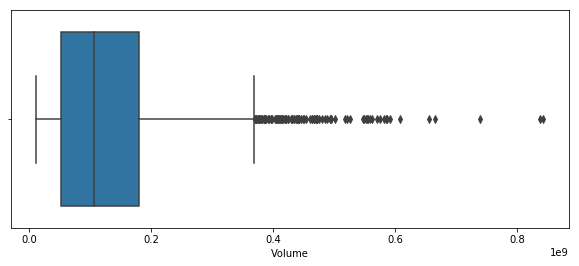

In [20]:
#Box Plot to understand the volume variation in AAPL stocks over the years.
plt.rcParams['figure.figsize'] = 10, 4; 
_=sns.boxplot(x='Volume', data=DataDictStocks['AAPL'])

The above plot show the trend that there was high volume of stocks intially and later very few stocks were distributed, this can be attributed to the fact that as the company grows the volume of stocks available decreases and due to their high price they are purchased by select few. The company took control over the volatility of the stocks in the market.

### Question:3 You need to take one stock and perform descriptive analysis  (Min, Max, explore some moving averages over the time) and Compare two stock’s descriptive analysis.

1. Variations in the values of the Walmart stock (WMT) over the years
2. Variations in High and Low prices for Walmart over the years.
3. To understand in which month the Walmart stock has sudden downfall in 2013-2014.
4. Average volume variation of stocks in Walmart
5. ROLLING AVERAGE 
6. 2-Stocks analysis in next step

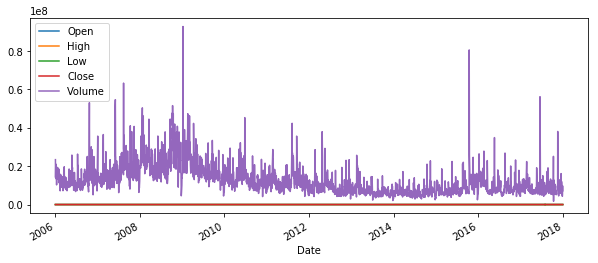

In [21]:
#1. Variations in the values of the Walmart stock (WMT) over the years
DataDictStocks['WMT'].set_index('Date').plot()
pylab.rcParams['figure.figsize'] = (6, 5)
plt.show()

From the above plot we can see that as the volume data scale is big 

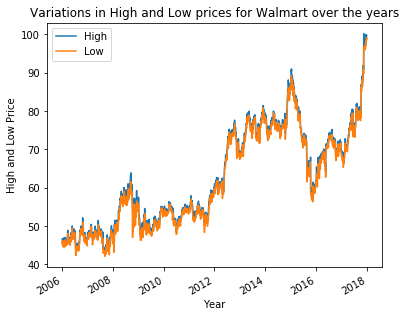

In [22]:
#Variations in High and Low prices for Walmart over the years.
DataDictStocks['WMT'][['Date','High','Low']].set_index('Date').plot()
pylab.rcParams['figure.figsize'] = (8, 12)
plt.xlabel('Year')
plt.ylabel('High and Low Price')
plt.title("Variations in High and Low prices for Walmart over the years")
plt.show()

From the above plot we can observe that there is not much variation in the High and Low stock prices of Walmart over the years.

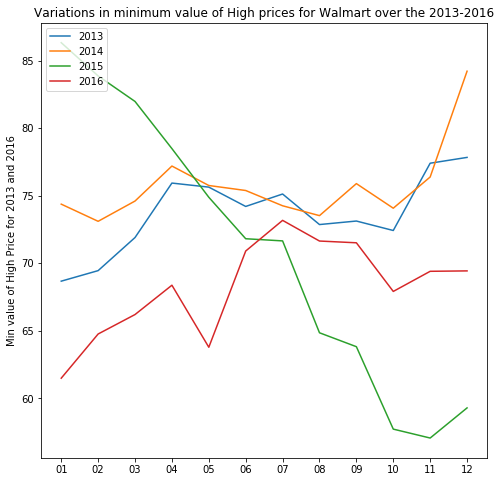

In [24]:
#To understand in which month the Walmart stock has sudden downfall in 2013-2014.
df_WMT_2013_2015=DataDictStocks['WMT'].groupby(['Year_No','Month_No'],as_index=False)[['High']].min()
df_WMT_2013_2015
df_WMT_2013=df_WMT_2013_2015[df_WMT_2013_2015['Year_No']=='2013']
df_WMT_2014=df_WMT_2013_2015[df_WMT_2013_2015['Year_No']=='2014']
df_WMT_2015=df_WMT_2013_2015[df_WMT_2013_2015['Year_No']=='2015']
df_WMT_2016=df_WMT_2013_2015[df_WMT_2013_2015['Year_No']=='2016']
pylab.rcParams['figure.figsize'] = (8, 8)
plt.plot(df_WMT_2013['Month_No'],df_WMT_2013['High'])
plt.plot(df_WMT_2014['Month_No'],df_WMT_2014['High'])
plt.plot(df_WMT_2015['Month_No'],df_WMT_2015['High'])
plt.plot(df_WMT_2016['Month_No'],df_WMT_2016['High'])
#df_WMT_2014.plot()
plt.ylabel('Min value of High Price for 2013 and 2016')
plt.title("Variations in minimum value of High prices for Walmart over the 2013-2016")
plt.legend(['2013','2014','2015','2016'], loc='upper left')
plt.show()

From the above graph we can see how the Walmart stock prices have raise from Jan-2013 to Dec-2014; then there was a big drop in the stock prices in Jan-2015, which took Walmart 10 month to bring the upward trend again.

***ROLLING AVERAGE ****

C:\Users\shwts\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


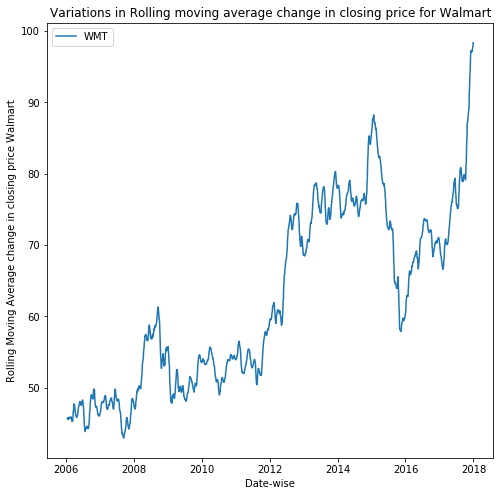

In [26]:
#Transforming the closing price to calculate the returns, to encompass any variation due to scale or normalization
df_WMT_Trans=DataDictStocks['WMT'][['Date','Close']]
df_WMT_Trans.head()
df_WMT_Trans['100MA_WMT']=df_WMT_Trans['Close'].rolling(12).mean()
pylab.rcParams['figure.figsize'] = (8, 8)
plt.plot(df_WMT_Trans['Date'],df_WMT_Trans['100MA_WMT'])
plt.ylabel('Rolling Moving Average change in closing price Walmart')
plt.xlabel('Date-wise')
plt.title("Variations in Rolling moving average change in closing price for Walmart")
plt.legend(['WMT'], loc='upper left')
plt.show()

The above plot shows the variation in the volume of stocks for Walmart. As per the previous high value analysis, we have seen that the stocks prices have plunged badly in 2013-2014, same is visible from the volume data. How the volume has also decreased so drastically.

************************ TWO STOCKS ANALYSIS **************************
1. Variation in closing price of Amazon and Google
2. Variation in Average volume of Amazon and Google
3. Variations in the value of closing price for Amazon and Google
4. Trend analysis based on Percentage Change 
5. Trend analysis based on previous value.
6. Based on Log value
7. 100 Moving Average.


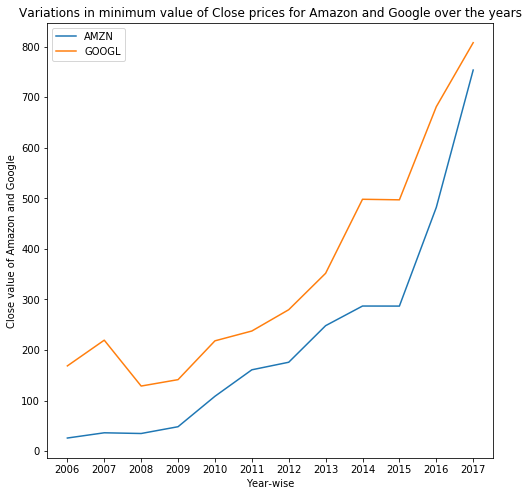

In [27]:
#Variation in closing price of Amazon and Google
stocks_AMZN = DataDictStocks['AMZN'].groupby(['Year_No'],as_index=False)[['Close']].min()
stocks_GOOGL = DataDictStocks['GOOGL'].groupby(['Year_No'],as_index=False)[['Close']].min()
pylab.rcParams['figure.figsize'] = (8, 8)
plt.plot(stocks_AMZN['Year_No'],stocks_AMZN['Close'])
plt.plot(stocks_GOOGL['Year_No'],stocks_GOOGL['Close'])
plt.ylabel('Close value of Amazon and Google')
plt.xlabel('Year-wise')
plt.title("Variations in minimum value of Close prices for Amazon and Google over the years")
plt.legend(['AMZN','GOOGL'], loc='upper left')
plt.show()

The above plot shows how Amazon stocks are competing with the Google stocks. Google had initial edge in 2006 but in 2017 Amazon stock prices are quite close to Google. Also we can see that both the companies where affected by recession in 2008-2009 but the stocks for Google were impacted more than Amazon. Amazon was quite stable during recession also had good increase in their stock prices after recession. Both the companies shown drop in stock prices during 2014 but after that amazon has shown exponential increase in its prices.

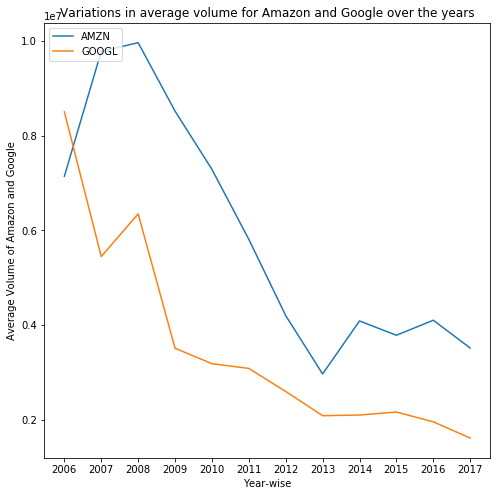

In [28]:
#Variation in Average volume of Amazon and Google
stocks_AMZN = DataDictStocks['AMZN'].groupby(['Year_No'],as_index=False)[['Volume']].mean()
stocks_GOOGL = DataDictStocks['GOOGL'].groupby(['Year_No'],as_index=False)[['Volume']].mean()
pylab.rcParams['figure.figsize'] = (8, 8)
plt.plot(stocks_AMZN['Year_No'],stocks_AMZN['Volume'])
plt.plot(stocks_GOOGL['Year_No'],stocks_GOOGL['Volume'])
plt.ylabel('Average Volume of Amazon and Google')
plt.xlabel('Year-wise')
plt.title("Variations in average volume for Amazon and Google over the years")
plt.legend(['AMZN','GOOGL'], loc='upper left')
plt.show()

As we have seen that the Closing price of Google and Amazon have gone up over the years but the average volumn of stocks have gone down drastically over the years.

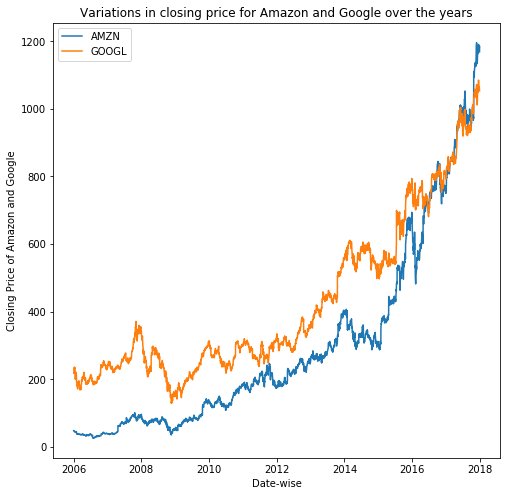

In [29]:
#Variations in the value of closing price for Amazon and Google
stocks_AMZN = DataDictStocks['AMZN'][['Date','Close']]
stocks_GOOGL = DataDictStocks['GOOGL'][['Date','Close']]
stocks_AG = pd.merge(stocks_AMZN,stocks_GOOGL,how='inner',on='Date')
pylab.rcParams['figure.figsize'] = (8, 8)
plt.plot(stocks_AMZN['Date'],stocks_AMZN['Close'])
plt.plot(stocks_GOOGL['Date'],stocks_GOOGL['Close'])
plt.ylabel('Closing Price of Amazon and Google')
plt.xlabel('Date-wise')
plt.title("Variations in closing price for Amazon and Google over the years")
plt.legend(['AMZN','GOOGL'], loc='upper left')
plt.show()

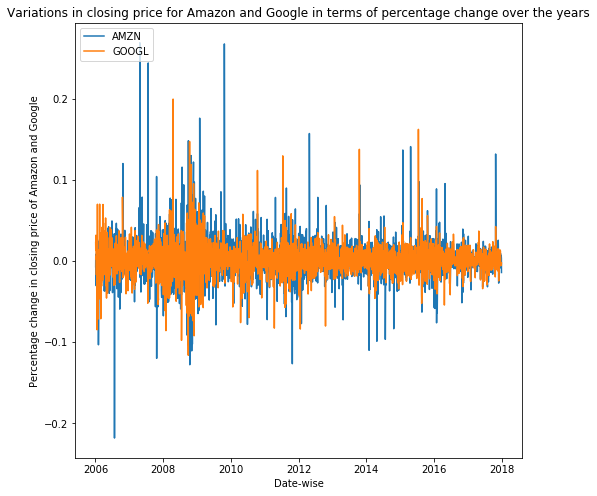

In [30]:
#Transforming the closing price to calculate the returns, to encompass any variation due to scale or normalization

#Variations in the value of closing price for Amazon and Google
stocks_AMZN = DataDictStocks['AMZN'][['Date','Close']]
stocks_GOOGL = DataDictStocks['GOOGL'][['Date','Close']]
stocks_AG = pd.merge(stocks_AMZN,stocks_GOOGL,how='inner',on='Date')
stocks_AG.head()
stocks_AG['AMZN_Return'] = stocks_AG['Close_x'].pct_change(1)
stocks_AG['GOOGL_Return'] = stocks_AG['Close_y'].pct_change(1)

pylab.rcParams['figure.figsize'] = (8, 8)
plt.plot(stocks_AG['Date'],stocks_AG['AMZN_Return'])
plt.plot(stocks_AG['Date'],stocks_AG['GOOGL_Return'])
plt.ylabel('Percentage change in closing price of Amazon and Google')
plt.xlabel('Date-wise')
plt.title("Variations in closing price for Amazon and Google in terms of percentage change over the years")
plt.legend(['AMZN','GOOGL'], loc='upper left')
plt.show()

Percentage change in closing price makes more sense than just comparing the actual closing price over the dates. Because it gives us better understanding of the increase or decrease in stock prices per day.
Looking at returns since the beginning of the period make the overall trend of the securities in question much more apparent. 

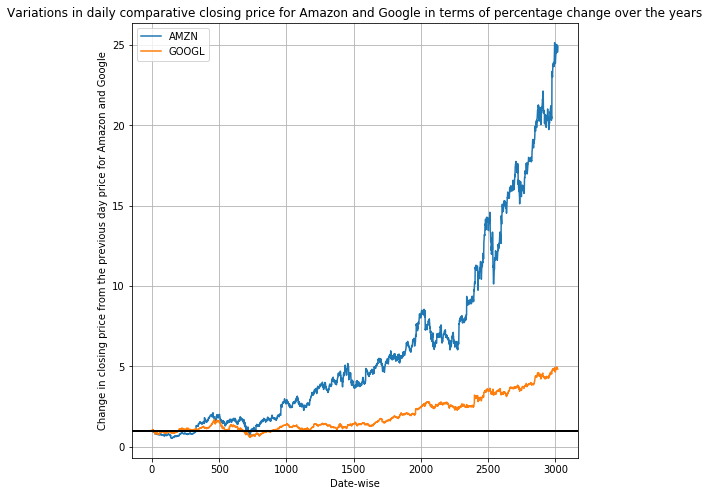

In [31]:
stocks_AG_Prev = pd.DataFrame({"AMZN": DataDictStocks['AMZN']["Close"],
                      "GOOGL": DataDictStocks['GOOGL']["Close"]})
stock_return_Prev = stocks_AG_Prev.apply(lambda x: x / x[0])
stock_return_Prev.plot(grid = True).axhline(y = 1, color = "black", lw = 2)
plt.ylabel('Change in closing price from the previous day price for Amazon and Google')
plt.xlabel('Date-wise')
plt.title("Variations in daily comparative closing price for Amazon and Google in terms of percentage change over the years")
plt.legend(['AMZN','GOOGL'], loc='upper left')
plt.show()

This is another way to show how the stock prices are changing over their previous value. Comparing the value with its previous value or percentage change helps in making better decisions. Because some stock prices are low but their overall increament is higher from the date of purchase than some stocks whose closing price is high but undergo minimal change from the purchase price.